## Assumptions about the data for linear regression

**Assumption 1**: The target (dependent) variable and the predictor (independent) variables should be continuous numerical values.

**Assumption 2**: There should be linear relationship between the predictor variable and the target variable. A scatterplot with the predictor and the target variables along the x-axis and the y-axis, can be used as a simple check to validate this assumption.

**Assumption 3**: There should not be any significant outliers in the data. 

**Assumption 4**: The data is iid (Independent and identically distributed). In other words, one observation should not depend on another.

**Assumption 5**: The residuals (difference between the actual value and predicted value) of a regression should not exhibit any pattern.  That is, they should be homoscedastic (exhibit equal variance across all instances). This assumption can be validated by plotting a scatter plot of the residuals. If the residuals exhibit a pattern, then they are not homoscedastic (in other words, they are heteroscedastic). If the residuals are randomly distributed, then it is homoscedastic in nature.

**Assumption 6**: The residuals of the regression line should be approximately normally distributed. The assumption can be checked by plotting a Normal Q-Q plot on the residuals.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading data from input csv file
computers = pd.read_csv("datasets/computers.csv")
# Printing the first 5 rows
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


Text(0.5, 1.0, 'Minutes vs. Units')

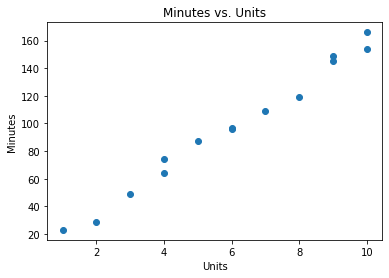

In [2]:
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'], computers['Minutes'])
plt.xlabel("Units")
plt.ylabel("Minutes")
plt.title("Minutes vs. Units")

From the above graph, there appears to be a linear relationship between the two variables. We also infer that, there are no significant outliers in the data. Also, all the observations are independent of one another. Thus, a simple linear regression model seems to be a good choice for this problem,

In [3]:
x = computers.Units 
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  4.161654135338296  coefficient :  15.508771929824569


In [4]:
# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*computers.Units
# Adding the predicted values to the dataset
computers['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
best_fit_model = computers[["Units","Minutes","min_best_fit_model"]]

### Inferences Concerning the Regression Coefficients

An important hypothesis to consider regarding the simple linear regression model (y = β0 + β1x1) is the hypothesis, β1 = 0.  If this hypothesis holds true, it means that the target is not influenced by the predictor. Otherwise if the alternate hypothesis (ß1 ≠ 0) is true, we can say the target is influenced by the predictor.

To test   H0 : β1 = 0   versus   H1 : β1 ≠ 0, we can use the t-test.

In t-test, the test statistic is calculated, and its p-value is determined. The null hypothesis (H0) is accepted if the p-value exceeds the level of significance requirement (usually, 5%). Otherwise, if p-value < 5%, we reject the null hypothesis and accept the alternate hypothesis.

So the t-test can be used to decide if any independent variable has a significant effect on the dependent variable.

The t-test checks only one co-efficient at a time. For assessing multiple coefficients simultaneously, the F-test can be used.

F-test compares a model with no predictors with the model you specify. A regression model that contains no predictors is also known as an intercept-only model.

The hypotheses for the F-test of the overall significance are as follows:

Null hypothesis: The fit of the intercept-only model and your model are equal.
Alternative hypothesis: The fit of the intercept-only model is significantly less compared to your model.


In [5]:
# building statistics model
import statsmodels.api as sm
X=sm.add_constant(computers[["Units"]])
y=computers['Minutes']
# regression model using Ordinary Least Squares
model=sm.OLS(y,X).fit()

In [6]:
model.summary()

C:\Users\Shrinath\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           8.92e-13
Time:                        08:17:58   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.239      -3.148      11.472
Units         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For a significance level of 0.05, the best fit model obtained for computer repairs data has a p-value (P>[t]) of 0.000 for 'Units'(as shown above) . The null hypothesis for t-test can thus be rejected since the p-value (0.000) is less than the significance level of 0.05. Hence the predictor 'Units' has significance in the prediction of the 'Minutes' (target).

The null hypothesis for the F-test can be rejected since the p-value 8.916e-13 (as shown above) is less than the significance level of 0.05. Hence, the F-test also confirms that the obtained best fit model is significant.

### Coefficient of determination
The **coefficient of determination** (R2) is the measure the amount of variation in the response values (i.e. predicted target values) corresponding to the input feature values across all the samples or observations.

In [7]:
SST = sum((computers.Minutes.mean() - computers.Minutes)**2)
SST
# 27768.357142857145
SSE = sum((best_fit_model.Minutes - best_fit_model.min_best_fit_model)**2)
SSE
# 348.848370927318
Rsq = (SST - SSE)/SST
Rsq
# 0.9874371980620736

0.9874371980620736

### Validating the assumption of homoscedasticity
The scale-location plot depicts the square rooted standardized residual vs. predicted value obtained using the best fit model. 

C:\Users\Shrinath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Standardized residuals')

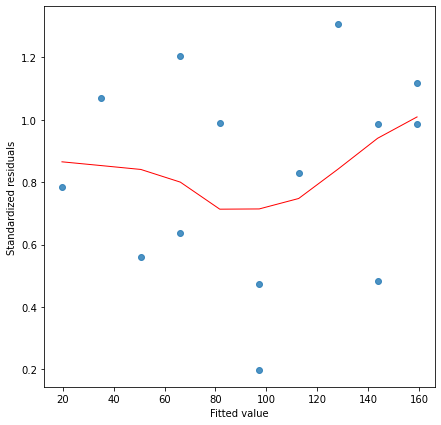

In [8]:
import seaborn as sns
# standard deviation of residuals
residual_error=computers["Minutes"]-best_fit_model.min_best_fit_model
sd=np.sqrt(np.sum(np.square(residual_error))/(residual_error.size-2))
# standardised residuals
sd_error=residual_error/sd
sq_abs_sd_err=np.sqrt(np.abs(sd_error))
plt.figure(figsize=(7,7))
sns.regplot(best_fit_model.min_best_fit_model,sq_abs_sd_err, scatter=True, lowess=True,
           line_kws={'color':'red', 'lw':1, 'alpha':1})
plt.xlabel("Fitted value")
plt.ylabel("Standardized residuals")

No specific pattern observed by the residuals in the plot, confirms that the linear regression model abide by the homoscedasticity assumption.

Residual plots can also be used to examine the homoscedastic nature of residuals in simple linear regression. A residual plot has the predictor alon g the x-axis and the residuals along the y-axis.

C:\Users\Shrinath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

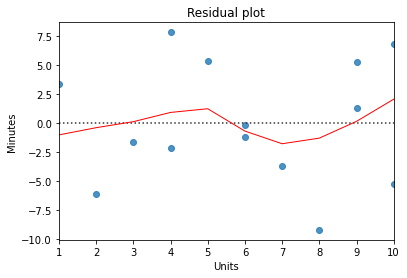

In [9]:
import seaborn as sns
sns.residplot('Units','Minutes',data=computers, lowess=True,
             line_kws={'color':'red', 'lw':1, 'alpha':1})
plt.xlabel("Units")
plt.title("Residual plot")

It can be observed that the above plot does not follow any specific pattern. This is an indicator that the relationship between the dependent and predictor variables is linear in nature. If the residual vs. predictor plot exhibits any pattern then the relationship between the predictors and target may be non-linear.

### Validating the Assumption That Errors are Normally Distributed

A linear regression model is said to be valid if its errors (residuals) are normally distributed. A Normal Q-Q plot can be used to validate this assumption.

Text(0.5, 1.0, 'Normal Q-Q Plot')

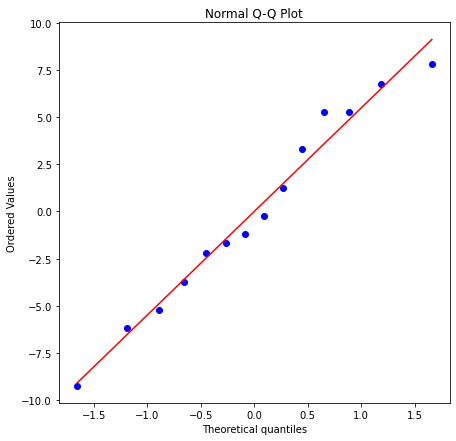

In [10]:
from scipy import stats
residual_error=computers['Minutes']-best_fit_model.min_best_fit_model
plt.figure(figsize=(7,7))
stats.probplot(residual_error, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")

**Shapiro-Wilk Test** : is a statistical test to check the normal distribution of a sample.

Null hypothesis: The sample is part of normal distribution population. The null hypothesis is accepted if the p-value is greater than 0.05
Alternate hypothesis: The sample is not from normal distribution. If p-value on the sample is less than 0.05, alternate hypothesis is accepted, and null hypothesis gets rejected.

In [11]:
from scipy.stats import shapiro
stat, p = shapiro(residual_error)
print(p)
# output
# 0.8401687741279602

0.8401687741279602


For a significance level of 0.05, the p-value obtained from the Shapiro-Wilk test suggests that the model abides by the assumption of normality since the p-value is greater than the chosen significance level.

### Exponetial Regression

In [12]:
Tire_useability = pd.read_csv("Exponential regression/datasets/Tire_useability.csv")
Tire_useability.head()

,Miles_driven,Percentage_Useable
0,1,98.2
1,2,91.7
2,5,81.3
3,10,64.0
4,20,36.4


Text(0, 0.5, 'Percentage Useable')

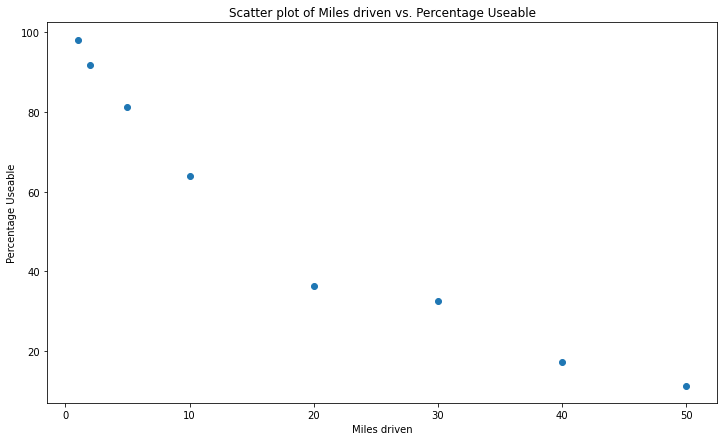

In [13]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "Percentage_Useable", data = Tire_useability)
plt.title("Scatter plot of Miles driven vs. Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Percentage Useable")

For the equation 

log(Percentage_Useable) = log(ß0) + ß1 (Miles_driven)

we can fit a simple linear regression model to predict the percentage usability of the tire based on the miles driven, where the dependent (target) variable is log(Percentage_Useable)  and the independent (predictor) variable is Miles_driven.

The scatter plot between log(Percentage_Useable) and Miles_driven (as shown below) also confirms the same.

Text(0, 0.5, 'Log of Percentage Useable')

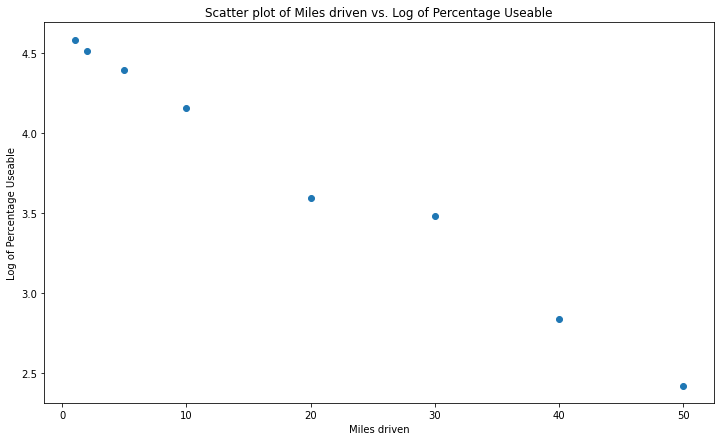

In [14]:
plt.figure(figsize=(12,7))
plt.scatter(x = Tire_useability["Miles_driven"], y = np.log(Tire_useability["Percentage_Useable"]))
plt.title("Scatter plot of Miles driven vs. Log of Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Log of Percentage Useable")

In [15]:
import statsmodels.formula.api as smf
exp_model = smf.ols(formula='np.log(Percentage_Useable) ~ Miles_driven ',
                    data = Tire_useability).fit()

In [16]:
exp_model.summary()

C:\Users\Shrinath\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(Percentage_Useable)   R-squared:                       0.988
Model:                                    OLS   Adj. R-squared:                  0.986
Method:                         Least Squares   F-statistic:                     492.0
Date:                        Wed, 30 Nov 2022   Prob (F-statistic):           5.49e-07
Time:                                08:18:01   Log-Likelihood:                 8.5732
No. Observations:                           8   AIC:                            -13.15
Df Residuals:                               6   BIC:                            -12.99
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.6046      0.051     89.850      0.000       4.479       4.730
Miles_driven    -0.0432      0.002    -22.182      0.000      -0.048      -0.038
==============================================================================
Omnibus:                        3.910   Durbin-Watson:                   3.060
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                0.581
Skew:                           0.533   Prob(JB):                        0.748
Kurtosis:                       3.779   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Percentage Useable')

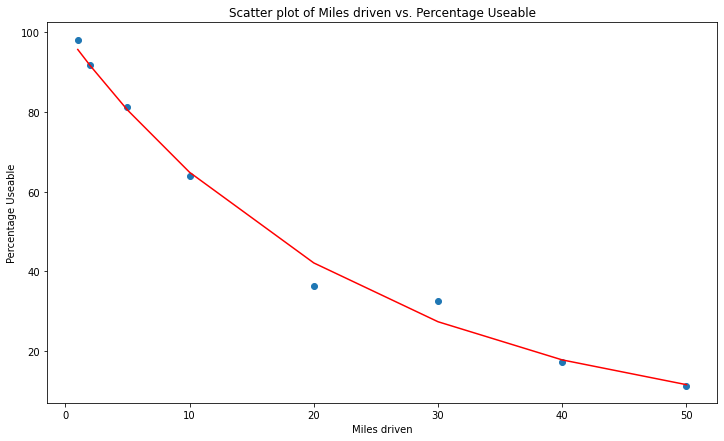

In [17]:
predictions = exp_model.predict(Tire_useability[["Miles_driven"]])
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "Percentage_Useable",data = Tire_useability)
plt.plot(Tire_useability["Miles_driven"],np.exp(predictions),'r')
plt.title("Scatter plot of Miles driven vs. Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Percentage Useable")

### Polynomial regression

Let us consider 'trees' dataset which contain details about the height of tree in feet, the girth of the tree in inches and the  volume of the tree in cubic feet.

We would like to build a machine learning model to predict the volume of the tree.

SInce the volume of a cylindrical structure is proportional to the radius squared, we will consider the function volume of trees  is proportional to Girth2. We shall thus try to predict the volume based on Girth2. 

In [18]:
trees = pd.read_csv("Polynomial regerssion/datasets/Trees.csv") # Reading data from input csv file
import statsmodels.formula.api as smf
poly_model=smf.ols(formula='Volume_cubic_feet ~ Girth_inches + I(Girth_inches**2)',data=trees).fit()

In the formula argument before the ~ operator, the target variable is specified, and after the ~ operator independent variables are specified. The operators in the formula have special interpretations, rather than their arithmetic interpretations. If we need the operators to be interpreted as arithmetic operators, we pass those expressions to the function I(). 

In [19]:
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Volume_cubic_feet   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     350.5
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.52e-20
Time:                        08:18:03   Log-Likelihood:                -79.746
No. Observations:                  31   AIC:                             165.5
Df Residuals:                      28   BIC:                             169.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.7863     11.223      0.961      0.345     -12.203      33.775
Girth_inches            -2.0921      1.647     -1.270      0.215      -5.467       1.282
I(Girth_inches ** 2)     0.2545      0.058      4.376      0.000       0.135       0.374
==============================================================================
Omnibus:                        0.529   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.653
Skew:                           0.220   Prob(JB):                        0.722
Kurtosis:                       2.442   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the previous model built, for a significance level of 0.05, the p-value for the obtained regression coefficients suggests that ß0 and ß1 are insignificant since their p-value is greater than the significance level. This further suggests that the term Girth2 alone could be a better predictor of volume, which is also ratified by the domain knowledge that volume is directly proportional to Girth2 .

Therefore the regression model that may be used to predict the volume of the tree based on Girth2 can be expressed as shown below:

Estimated Volume  = ß0 + ß1 * Girth2

In [20]:
poly_model2=smf.ols(formula='Volume_cubic_feet ~ I(Girth_inches**2)',data=trees).fit()

In [21]:
poly_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Volume_cubic_feet   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     684.8
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.01e-21
Time:                        08:18:03   Log-Likelihood:                -80.614
No. Observations:                  31   AIC:                             165.2
Df Residuals:                      29   BIC:                             168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.3551      1.417     -2.368      0.025      -6.253      -0.457
I(Girth_inches ** 2)     0.1812      0.007     26.169      0.000       0.167       0.195
==============================================================================
Omnibus:                        0.830   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.756
Skew:                          -0.056   Prob(JB):                        0.685
Kurtosis:                       2.243   Cond. No.                         479.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-Squared value for the obtained regression model suggests that approximately 95.9 % of variability in the volume can be explained by variability in the girth2 of the trees.

It can also be observed that the regression coefficients are significant for a significance level of 0.05 (since the obtained p-values are lesser than the chosen significance level).

In [22]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Girth_inches       31 non-null     float64
 1   Height_feet        31 non-null     int64  
 2   Volume_cubic_feet  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 872.0 bytes


In [23]:
predictions = -3.3551 + 0.1812*(trees.Girth_inches)**2

Text(0.5, 1.0, 'Non-Linear Regression Model')

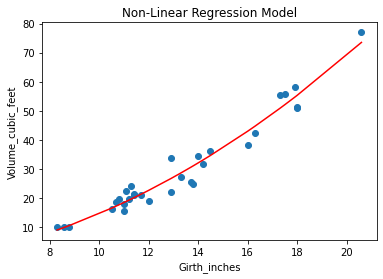

In [24]:
fig,ax = plt.subplots()
ax.scatter(x="Girth_inches",y="Volume_cubic_feet",data=trees)
ax.plot(trees.Girth_inches,predictions,color="red")
ax.set_ylabel("Volume_cubic_feet")
ax.set_xlabel("Girth_inches")
ax.set_title("Non-Linear Regression Model")

##### IMP

Consider that, a dataset fits well to a multiple linear regression model M1. The model M1, gives a high value for the metric R-squared. The model with the higher degree will try to fit more data points compared to a linear model. Polynomial model will be an overfitting model

Consider that, a dataset fits well to a polynomial model M1. The model M1, gives a high value for the metric R-squared. A linear model might not be able to fit to as many data points as a polynomial model. Multiple linear regression model will be an underfitting model.

## Multiple linear regression model

In [25]:
# read the data from input csv file
delivery = pd.read_csv("delivery.csv")
# view sample data
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [26]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


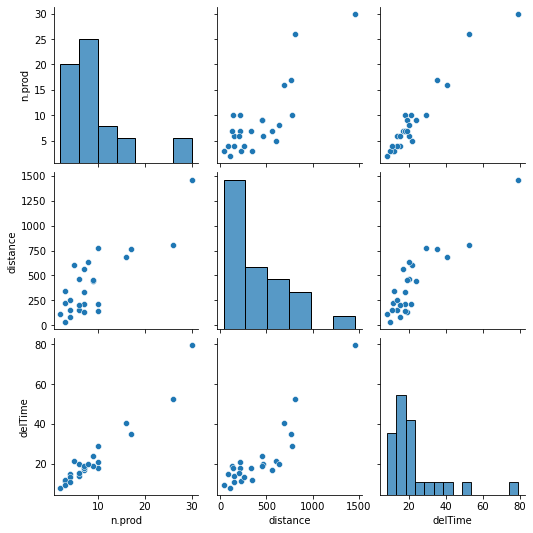

In [27]:
# Visualizing data
import seaborn as sns
sns.pairplot(delivery)

In [28]:
# importing the required module to build the model
from sklearn.linear_model import LinearRegression
# Instantiating the algorithm for building the model
model = LinearRegression()
# selecting the predictors and targets
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]
# building the model using fit() method
model.fit(X,y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)
# Sample output for the above code
# Intercept: 2.3412311451922 
# Coefficients: [1.61590721 0.01438483]

Intercept: 2.3412311451922 
Coefficients: [1.61590721 0.01438483]


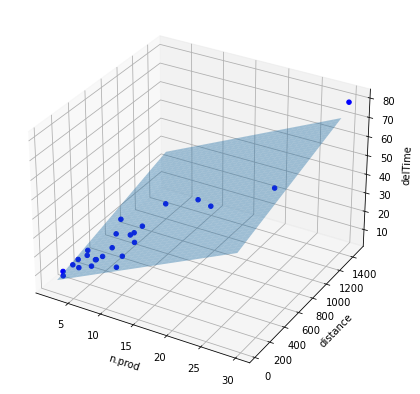

In [29]:
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')#projection = '3d' is used to have 3D axes
#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")
#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})
#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)
#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface

#### Assessing the best fit model

1. Validating the Assumption of Linearity

In [30]:
predictions = 2.3412311451922 + (1.61590721*delivery["n.prod"]) + (0.01438483*delivery.distance)

residuals = delivery.delTime - predictions

C:\Users\Shrinath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

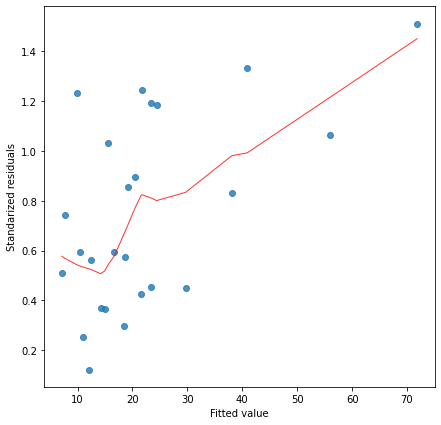

In [31]:
sd=np.sqrt(np.sum(np.square(residuals))/(residuals.size-3))
# standardised residuals
sd_error=residuals/sd
sq_abs_sd_err=np.sqrt(np.abs(sd_error))
plt.figure(figsize=(7,7))
sns.regplot(predictions, sq_abs_sd_err,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

The above plot seems to indicate that the regression model is not so good with the given data, as we see some pattern in the residuals. May be, if data cleaning activities are performed, we might get better results.

2. Validating the Assumption of Normality

Text(0.5, 1.0, 'Normal Q-Q Plot')

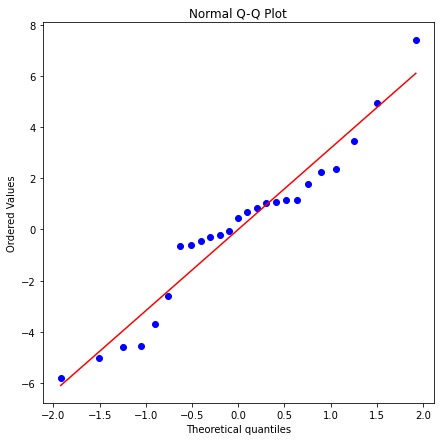

In [32]:
residuals = delivery["delTime"] - predictions
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

For the delivery time data set, the Q-Q plot of the residuals of the best fit model (shown below) indicates the adherence to normality assumption since the residual points are close to the normal line.

3. Assumption of Independence

In a multiple regression model where two or more predictor variables are involved, it is possible that one predictor can be linearly predicted from the others, with a substantial degree of accuracy. In such a situation, the predictors are said to be highly correlated. In statistics, this phenomenon is called multicollinearity.

The variables are suggested to be linearly dependent if the correlation values are close to 1. 

**Validating the Assumption of Independence Using VIF**

variance inflation factor(VIF) to determine if the predictor variables are independent of each other.

To calculate VIF for the candidate feature 'x1', we need to build a model that predicts 'x1' from the rest of the predictors considered (in this case, 'x2' and 'x3'). Similarly VIF for feature 'x2' and 'x3' will be calculated.

VIFi is given as, VIFi = 1/(1-Ri^2)

where Ri2 is the coeffecient of determination while predicting candidate predictor i, using rest of the candidate predictors.

The range of VIF values start from 1. As a common practice, we can interpret the VIF values as follows -

1 => No correlation between varaibles

1 to 5 => Slightly correlated

Greater than 5 => Highly correlated

In [33]:
# finding the correlation
np.corrcoef(delivery["n.prod"],delivery["distance"])
# correlation value derived - 0.824215

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(X.values,idx) 
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64


It can be observed that the VIF values are greater than 5 for both n.prod and distance features. Also we see that both the features are exhibiting a high correlation value between them. 

4. coefficient of determination

In [35]:
# score() method for regression model, returns the 'coefficient of determination' (r^2) value for the model
model.score(X,y)
# sample model score as output
#0.9595937494832257

0.9595937494832257

It can be observed that the R2 value for the obtained best fit linear regression model is approximately 0.9595937. The R2 value here indicates that approximately 95.95 % of the variability observed in the delTime of the vending machine can be explained by variability in the predictor variables, n.prod and distance.

5. Adjusted R-square

Using the least squares method, we try to establish a best fit linear regression model with minimum error. For a linear regression model, every additional predictor variable tends to minimize the error of the model. As a result, the R2 value will never decrease for any number of additional predictor variables being included in the model.

In [36]:
# Model with a single predictor - n.prod
model1 = LinearRegression()
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print(model1.score(delivery[features],delivery[target]))
#sample model1 score
#0.9304813135986855
# Model with multiple predictors - n.prod,distance
model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print(model2.score(delivery[features],delivery[target]))
#sample model2 score
#0.9595937494832257

0.9304813135986855
0.9595937494832257


In other words, the R2 value can be inflated by including more and more predictor variables.

Thus the use of an additional statistic known as adjusted R2 is suggested. The adjusted R2 takes into account the number of predictor variables and the number of samples or observations included in the regression model.

In [37]:
#computation of adjusted R-squared
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)
#sample adjusted R-Squared
#0.9559204539817008

0.9559204539817008


In [38]:
import statsmodels.api as sm
X = sm.add_constant(delivery[["n.prod","distance"]])
y = delivery["delTime"]
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delTime   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           4.69e-16
Time:                        08:18:09   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3412      1.097      2.135      0.044       0.067       4.616
n.prod         1.6159      0.171      9.464      0.000       1.262       1.970
distance       0.0144      0.004      3.981      0.001       0.007       0.022
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.010
Skew:                           0.032   Prob(JB):                        0.995
Kurtosis:                       3.073   Cond. No.                         873.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An adjusted R2 of 0.956 indicates that approximately 95.6% variability in the delivery time of the vending machine can be explained by the model having the predictor variables n.prod and distance.

In addition to the R2 and the adjusted R2 values of 0.960 and 0.956 (which indicate the usefulness of the model), the F-test also suggests that the model is significant since the p-value for the F-test is less than the chosen significance level of 0.05.

## Generalized linear regression model

The linear regression model we discussed assumed that:

1. The data is continuous.

2. The error random variable ϵ has normal distribution ~N(0, σ2). This means that the error is homogenously distributed.

3. The output variable Yi has a Gaussian distribution.

 

Consider the following scenario.

Example: The data below is collected for age, weight, and coronary heart disease (CHD) to study if age and weight have any relation to heart disease. CHD column is categorical (1 for Yes and 0 for No).

The output is 0/1, a categorical variable.  In this case, the error is not distributed normally. It will be either 0/1. The error has a binomial distribution.

The linear model assumptions are not valid for this case. Hence, the linear model needs to be modified for these requirements. Such models are called generalized linear model.

The generalized linear model (GLM) is a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution. Generalized linear models were formulated by John Nelder and Robert Wedderburn.

Generalized linear model has 3 components:

1. Random component (noise) – Linear regression model assumes that the error term has a normal distribution. GLM extends this to other types of distributions like binomial, Poisson, exponential etc. These distributions are collectively referred to as exponential family. Error is modelled using this family of distributions.

2. Systematic component – The linear predictor is the systematic component. It is expressed as a linear combination of unknown parameters β. Linear predictor is denoted by the symbol η. For linear model, η is the mean. 

                                    η = a + b1x1 + b2x2

where b is an estimator of β. In generalized linear model, x1, x2 can be continuous or discrete. It is related to the expected value of the data through the link function discussed below.                        

3. Link function g(.) – The link function g(.) provides the relationship between the linear predictor(η) and the mean of the distribution (from the exponential family) function. It connects the random and the systematic components.

g(μ) = η, where μ is the mean of the chosen distribution.

in linear regression models, the dependent (target) variable is continuous quantitative in nature. In situations where the nature of dependent (target) variable is categorical, the logistic regression can be used to model the relationship. Recall that the logistic regression model is given as


The nature of logistic regression can be binomial, ordinal or multinomial. In order to predict dependent (target) variable which can take only two values (yes/no , 0/1) Binomial (or binary) logistic regression model is used.  Multinomial logistic regression is used when the dependent variable can take three of more categorical values which are not ordered. Whereas the ordinal logistic regression is used when the dependent variable can take categorical values that are ordered.

#### check logistic regression example in ML notebook